In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
path='/content/drive/MyDrive/Final year project 22-23/augmented_dataset/'
dataset_path = os.listdir(path)

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['single_thermal', 'multi_thermal', 'dust_thermal', 'diode_thermal', 'pid_thermal', 'output']
Types of classes labels found:  6


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 if item == 'output':
   continue
 all_classes = os.listdir(path + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [ ]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
df

,Labels,image
0,single_thermal,dataset_path/single_thermal/FLIR0761.jpg
1,single_thermal,dataset_path/single_thermal/FLIR0766.jpg
2,single_thermal,dataset_path/single_thermal/FLIR0819.jpg
3,single_thermal,dataset_path/single_thermal/FLIR0799.jpg
4,single_thermal,dataset_path/single_thermal/FLIR0535.jpg
...,...,...
1580,pid_thermal,dataset_path/pid_thermal/FLIR0288_h.jpg
1581,pid_thermal,dataset_path/pid_thermal/FLIR0298_h.jpg
1582,pid_thermal,dataset_path/pid_thermal/FLIR0437_h.jpg
1583,pid_thermal,dataset_path/pid_thermal/FLIR0687.jpg


In [ ]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1585
single_thermal    500
pid_thermal       350
multi_thermal     299
diode_thermal     280
dust_thermal      156
Name: Labels, dtype: int64


In [ ]:
# grouped = df.groupby(['Labels'])
# pid=grouped.get_group("pid_thermal")
# diode=grouped.get_group("diode_thermal")
# single=grouped.get_group("single_thermal")
# multi=grouped.get_group('multi_thermal')
# dust=grouped.get_group("dust_thermal")
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
# train_s, test_s = train_test_split(single, test_size=0.3, random_state=42, shuffle=True)
# train_d, test_d = train_test_split(diode, test_size=0.3, random_state=42, shuffle=True)
# train_m, test_m = train_test_split(multi, test_size=0.3, random_state=42, shuffle=True)
# train_du, test_du = train_test_split(dust, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
import cv2
dataset_path = os.listdir(path)

im_size = 224

images = []
labels = []

for i in dataset_path:
    if i=='output':
      continue
    data_path = path +'/'+ str(i)
    filenames = [i for i in os.listdir(data_path) ]
    for f in filenames:
      img = cv2.imread(data_path + '/' + f)
      img = cv2.resize(img, (im_size, im_size))
      images.append(img)
      labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1585, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['single_thermal' 'single_thermal' 'single_thermal' ... 'pid_thermal'
 'pid_thermal' 'pid_thermal']
[4 4 4 ... 3 3 3]


In [ ]:
y=y.reshape(-1,1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

  (0, 4)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (4, 4)	1.0
  (0, 4)	1.0
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 4)	1.0
  (4, 4)	1.0
  (5, 4)	1.0
  (6, 4)	1.0
  (7, 4)	1.0
  (8, 4)	1.0
  (9, 4)	1.0
  (10, 4)	1.0
  (11, 4)	1.0
  (12, 4)	1.0
  (13, 4)	1.0
  (14, 4)	1.0
  (15, 4)	1.0
  (16, 4)	1.0
  (17, 4)	1.0
  (18, 4)	1.0
  (19, 4)	1.0
  (20, 4)	1.0
  (21, 4)	1.0
  (22, 4)	1.0
  (23, 4)	1.0
  (24, 4)	1.0
  :	:
  (1525, 3)	1.0
  (1526, 3)	1.0
  (1527, 3)	1.0
  (1528, 3)	1.0
  (1529, 3)	1.0
  (1530, 3)	1.0
  (1531, 3)	1.0
  (1532, 3)	1.0
  (1533, 3)	1.0
  (1534, 3)	1.0
  (1535, 3)	1.0
  (1536, 3)	1.0
  (1537, 3)	1.0
  (1538, 3)	1.0
  (1539, 3)	1.0
  (1540, 3)	1.0
  (1541, 3)	1.0
  (1542, 3)	1.0
  (1543, 3)	1.0
  (1544, 3)	1.0
  (1545, 3)	1.0
  (1546, 3)	1.0
  (1547, 3)	1.0
  (1548, 3)	1.0
  (1549, 3)	1.0


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.25, random_state=415)
train_x=tf.convert_to_tensor(train_x)
train_y=train_y.toarray()
test_x=tf.convert_to_tensor(test_x)
test_y=test_y.toarray()
#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1188, 224, 224, 3)
(1188, 5)
(397, 224, 224, 3)
(397, 5)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 5
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
from tensorflow import keras
base_model = tf.keras.Model(inputs, outputs)
model=keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(5, activation = "softmax"))
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()
hist = model.fit(train_x, train_y, epochs=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 5)                 4055976   
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 4,056,006
Trainable params: 4,013,983
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/100
38/38 - 52s - loss: 1.6104 - accuracy: 0.2980 - 52s/epoch - 1s/step
Epoch 2/100
38/38 - 9s - loss: 1.6556 - accuracy: 0.2845 - 9s/epoch - 240ms/step
Epoch 3/100
38/38 - 9s - loss: 1.6160 - accuracy: 0.3039 - 9s/epoch - 243ms/step
Epoch 4/100
38/38 - 9s - loss: 1.5540 - accuracy: 0.3779 - 9s/epoch - 244ms/step
Epoch 5/100
38/38 - 9s - loss: 1.5327 - accuracy: 0.3906 - 9s/epoch - 245ms/step
Epoch 6/100
38/38 - 9s - loss: 1.

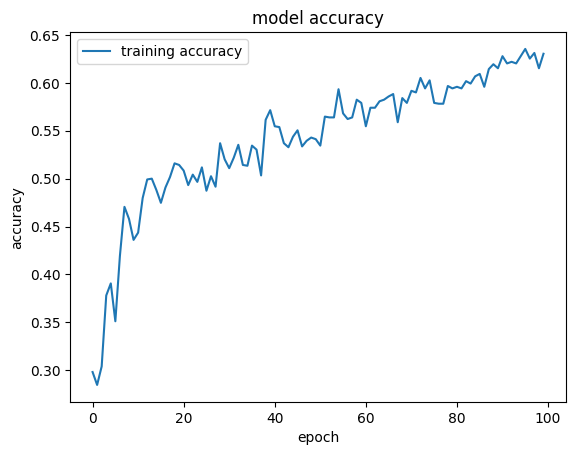

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["training accuracy"], loc="upper left")
    plt.show()


plot_hist(hist)

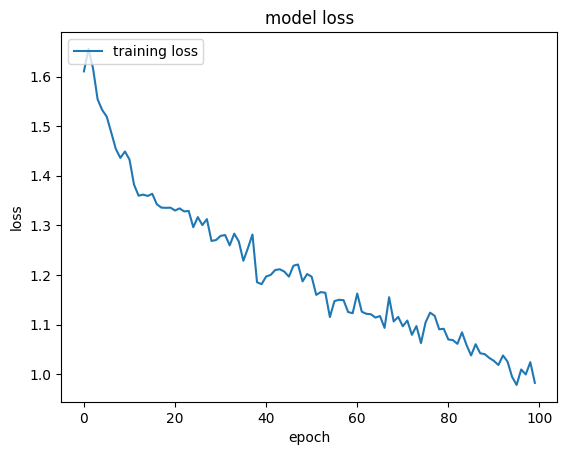

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["training loss"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 [==============================] - 4s 106ms/step - loss: 1.1912 - accuracy: 0.5164
Loss = 1.1911561489105225
Test Accuracy = 0.516372799873352


Input image shape: (1, 224, 224, 3)


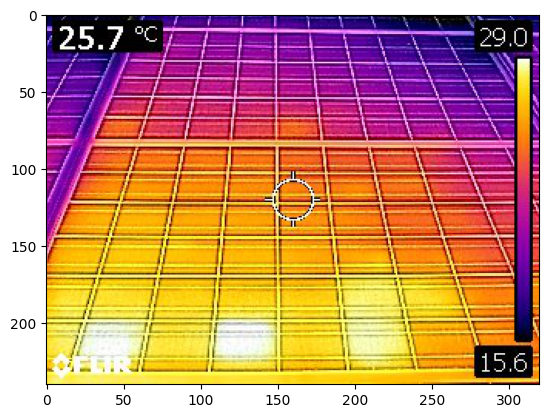

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/Final year project 22-23/thermal data/thermal data/single_thermal/FLIR0010.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds

1/1 [==============================] - 0s 41ms/step


array([[0., 1., 0., 0., 0.]], dtype=float32)